In [8]:
# Task 1: Classify Samples
import numpy as np

#function for linear classification
def linear_classifier(x: np.ndarray, w: np.ndarray, b: float):
    return np.sign(np.dot(x, w) + b)

# define the problem data
weights = [ 
    np.array([0,1]),
    np.array([0,1]),
    np.array([1,7]),
    np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
]

biases = [0, 3, -3, 1.23]

test_points = [
    np.array([1, -2]),
    np.array([1, -2]),
    np.array([3, 4]),
    np.array([3, 4, -13, 7, 15, -6, -9, 17, 11, 15])
]

for w,b,xs in zip(weights, biases, test_points):
    print(f"w: {w}, b: {b}, x: {xs}, result: {linear_classifier(xs, w, b)}")



w: [0 1], b: 0, x: [ 1 -2], result: -1
w: [0 1], b: 3, x: [ 1 -2], result: 1
w: [1 7], b: -3, x: [3 4], result: 1
w: [ 1  2  3  4  5  6  7  8  9 10], b: 1.23, x: [  3   4 -13   7  15  -6  -9  17  11  15], result: 1.0


/var/folders/k5/dk0grjxn7hxd5b51zfjchk980000gn/T/ipykernel_1722/2072210877.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


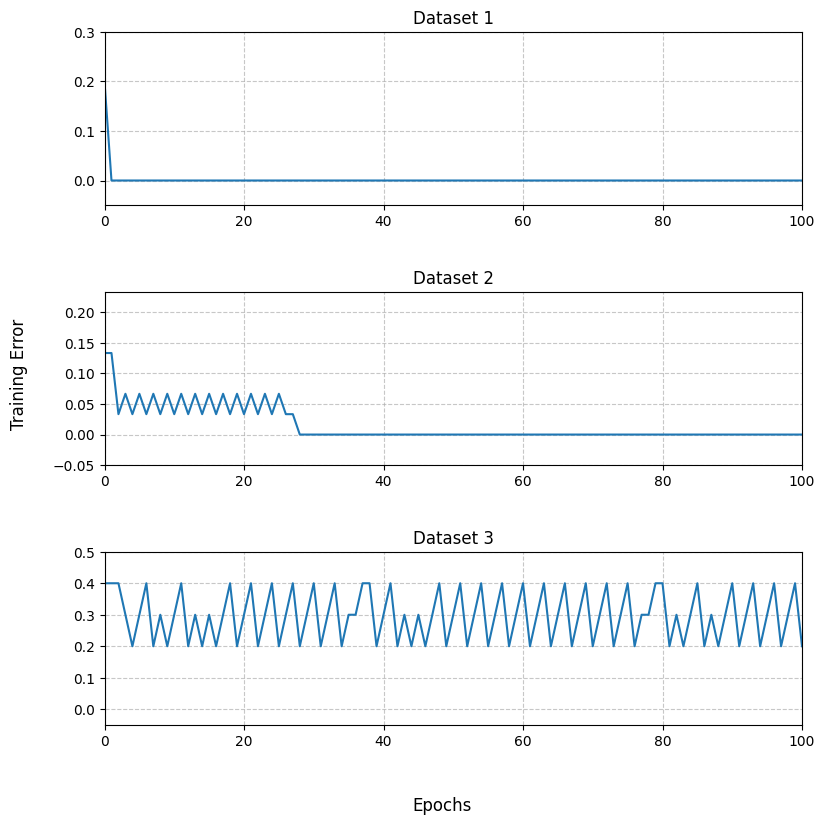

In [9]:
# Task 2: Perceptron without Offset
import numpy as np
import matplotlib.pyplot as plt

def perceptron_without_offset(Xs, ys , epochs):
    # initialize weights
    ws = np.zeros_like(Xs[0]) # make sure ws is the same shape as Xs[0]

    training_errors = []
    for epoch in range(epochs):
        errors = 0
        for x, y in zip(Xs, ys):
            prediction = linear_classifier(x, ws, 0)
            if prediction != y:
                ws += y * x
                errors += 1
            else:
                pass
        # calculate training error
        training_error = errors / len(Xs)
        training_errors.append(training_error)
        # print(f"Epoch {epoch}, Training Error: {training_error}")
    return ws, training_errors

# I extracted the data using ChatGPT 
datasets = [
    {
        "Xs": [
            [0.87578245, 0.30375931, 1.691093],
            [-0.53813241, -0.45833158, -1.12207415],
            [0.99702363, -0.08317198, -0.222416],
            [0.72118904, -0.24845405, 0.1664802],
            [0.31284622, -0.40632737, 0.73926731],
            [0.20900079, -0.20243908, -0.67501829],
            [0.48727053, -0.71112876, 1.50976111],
            [0.15070634, 0.26012988, -0.08667005],
            [-0.65639742, 1.07434399, 2.09392423],
            [-0.73303502, -0.15598171, -0.14274047]
        ],
        "ys": [1, -1, 1, 1, 1, -1, 1, -1, 1, -1]
    },
    {
        "Xs": [
            [0.58715982, 0.76053109],
            [-1.09492364, 2.07989924],
            [0.04097468, -0.09437459],
            [-1.15073364, -0.81630217],
            [0.57206772, 0.3813378],
            [0.93345859, 0.92408983],
            [0.58881134, -0.71864108],
            [-0.07350665, 0.51727535],
            [-1.32103648, 1.2211991],
            [-0.82438608, 0.35219818],
            [-0.89396187, 0.67834576],
            [-1.56266947, 1.01928997],
            [-0.06133912, 0.57360667],
            [0.23596025, 0.5329578],
            [1.21315196, 2.27594733],
            [-1.03981669, -0.89622489],
            [0.13371041, -0.39055231],
            [0.81622561, 0.42530499],
            [0.24819307, 0.86653034],
            [0.27427925, 0.78433078],
            [-0.17038365, -3.21936226],
            [-0.47376705, 0.21173016],
            [0.7697084, -0.16046939],
            [1.55237121, 0.6258206],
            [1.93907678, 1.07390485],
            [-0.6018449, 0.07496144],
            [0.15338813, 1.10189419],
            [-0.96326495, 1.59790052],
            [-0.68733638, -1.42420832],
            [-1.26075745, -0.273788]
        ],
        "ys": [1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1]
    },
    {
        "Xs": [
            [-0.31909535, -0.09867284],
            [-2.03820957, -0.63471519],
            [0.91455592, -0.24052323],
            [0.52258241, -0.73623614],
            [-0.73571052, 1.58181469],
            [0.02969905, 2.51855278],
            [-0.51895267, -1.45991397],
            [0.96851532, -0.36872916],
            [-0.67072931, 1.87263213],
            [1.38877095, -0.66055964]
        ],
        "ys": [1, -1, 1, -1, 1, 1, -1, 1, 1, -1]
    }
]

trained_ws = []
training_errors = []
for dataset in datasets:
    xs = np.array(dataset["Xs"])
    ys = np.array(dataset["ys"])
    ws, err = perceptron_without_offset(xs, ys, 101)
    print
    trained_ws.append(ws)
    training_errors.append(err)

# safe the ws into a txt file
with open('ws_task2.txt', 'w') as f:
    for w in trained_ws:
        f.write(f"{np.round(w, 2)}\n")


fig, ax = plt.subplots(3, 1, figsize=(9, 9), gridspec_kw={'hspace': 0.5})
# Share y-axis across all subplots
max_error = max(max(errors) for errors in training_errors)
fig.supylabel('Training Error')
fig.supxlabel('Epochs')
for i, errors in enumerate(training_errors):
    ax[i].plot(errors)
    ax[i].set_title(f'Dataset {i+1}')
    ax[i].grid(True, linestyle='--', alpha=0.7)
    ax[i].tick_params(axis='both', which='major', labelsize=10)
    ax[i].set_ylim(-0.05, max(errors)+0.1)
    ax[i].set_xlim(0, 100)
plt.tight_layout()
fig.savefig('training_errors_perceptron_without_offset.png')






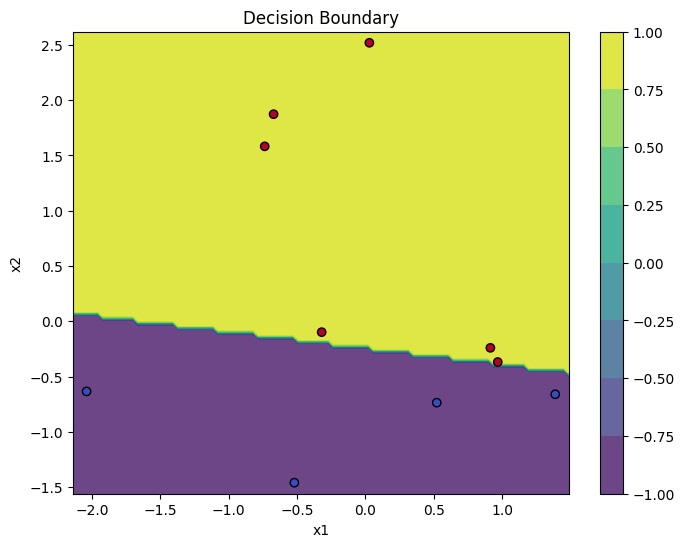

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Task 3: Averaged Perceptron with Offset

def plot_decision_boundary(w, b, X=None, y=None, x_range=(-10, 10), y_range=(-10, 10), n_points=100):
    # Create a grid of points
    if X is not None:
        for x in X:
            if len(x) != 2:
                return False

    margin = 0.1
    x_1 = np.linspace(min(X[:,0])-margin, max(X[:,0])+margin, n_points)
    x_2 = np.linspace(min(X[:,1])-margin, max(X[:,1])+margin, n_points)
    x1, x2 = np.meshgrid(x_1, x_2)

    # Calculate the predictions
    predictions = linear_classifier(np.c_[x1.ravel(), x2.ravel()], w, b)
    predictions = predictions.reshape(x1.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(x1, x2, predictions, alpha=0.8, cmap='viridis')
    plt.colorbar()

    # Plot training data if provided
    if X is not None and y is not None:
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='black')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Decision Boundary')
    plt.show()

def averaged_perceptron_with_offset(Xs, ys, epochs):
    # initialize weights
    ws = np.zeros_like(Xs[0]) # make sure ws is the same shape as Xs[0]
    b = 0
    c = 1
    
    training_errors = []
    for epoch in range(epochs):
        errors = 0
        for x, y in zip(Xs, ys):
            prediction = linear_classifier(x, ws, b)
            if prediction != y:
                errors += 1
                ws += c*y * x
                b += c*y
            c -= 1/(len(Xs)*epochs)
        # calculate training error
        training_error = errors / len(Xs)
        training_errors.append(training_error)
    return ws, b, training_errors

# I extracted the data using ChatGPT 
datasets = [
    {
        "Xs": [
            [-1.76762651, 0.25606913, 0.42479004],
            [-0.28857931, 0.62839084, 0.03800888],
            [-0.52516867, 2.27344459, -1.24928071],
            [-0.51704967, -1.92189839, 0.75714427],
            [0.47149895, -0.4314566, 0.02741449],
            [1.14736743, 0.73926771, -0.25313897],
            [-0.36569072, 0.06845024, -1.01979881],
            [0.33973728, 0.36858664, 1.33468387],
            [-0.93029838, 0.72336265, -1.54566681],
            [-0.41389771, -0.19616516, 0.32847688]
        ],
        "ys": [1, 1, 1, -1, -1, 1, -1, 1, -1, -1]
    },
    {
        "Xs": [
            [-0.31909535, -0.09867284],
            [-2.03820957, -0.63471519],
            [0.91455592, -0.24052323],
            [0.52258241, -0.73623614],
            [-0.73571052, 1.58181469],
            [0.02969905, 2.51855278],
            [-0.51895267, -1.45991397],
            [0.96851532, -0.36872916],
            [-0.67072931, 1.87263213],
            [1.38877095, -0.66055964]
        ],
        "ys": [1, -1, 1, -1, 1, 1, -1, 1, 1, -1]
    }
]

trained_ws = []
training_errors = []
trained_bs = []
for dataset in datasets:
    xs = np.array(dataset["Xs"])
    ys = np.array(dataset["ys"])
    ws, bs, err = averaged_perceptron_with_offset(xs, ys, 100)
    trained_ws.append(ws)
    trained_bs.append(bs)
    training_errors.append(err)
    plot_decision_boundary(ws, bs, xs, ys)




# safe the ws into a txt file
with open('ws_task3.txt', 'w') as f:
    for w in trained_ws:
        f.write(f"{np.round(w, 2)}\n")

# safe the bs into a txt file
with open('bs_task3.txt', 'w') as f:
    for b in trained_bs:
        f.write(f"{np.round(b, 2)}\n")

fig, ax = plt.subplots(2, 1, figsize=(9, 9), gridspec_kw={'hspace': 0.5})
# Share y-axis across all subplots
max_error = max(max(errors) for errors in training_errors)
fig.supylabel('Training Error')
fig.supxlabel('Epochs')
for i, errors in enumerate(training_errors):
    ax[i].plot(errors)
    ax[i].set_title(f'Dataset {i+1}')
    ax[i].grid(True, linestyle='--', alpha=0.7)
    ax[i].tick_params(axis='both', which='major', labelsize=10)
    ax[i].set_ylim(-0.05, max(errors)+0.1)
    ax[i].set_xlim(0, 100)
fig.savefig('training_errors_perceptron_with_offset.png')
plt.close()

   

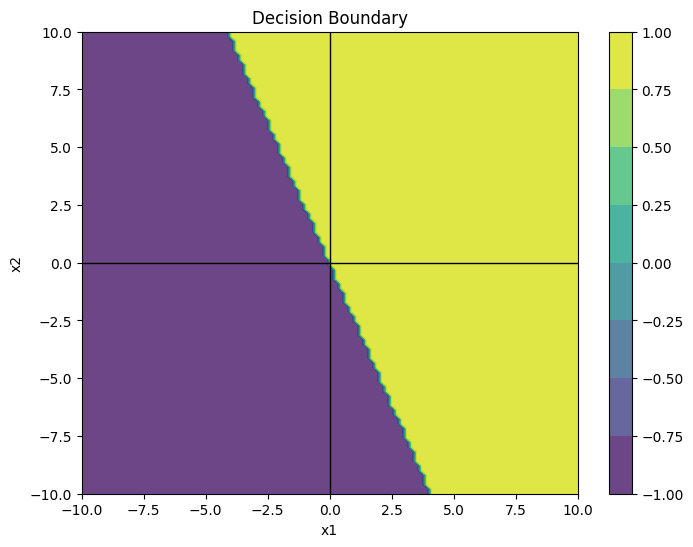

In [11]:
# Task 4: Visualizing the decision boundary

def plot_decision_boundary(w, b, X=None, y=None, x_range=(-10, 10), y_range=(-10, 10), n_points=100):
    # Create a grid of points
    x1 = np.linspace(x_range[0], x_range[1], n_points)
    x2 = np.linspace(y_range[0], y_range[1], n_points)
    x1, x2 = np.meshgrid(x1, x2)

    # Calculate the predictions
    predictions = linear_classifier(np.c_[x1.ravel(), x2.ravel()], w, b)
    predictions = predictions.reshape(x1.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(x1, x2, predictions, alpha=0.8, cmap='viridis')
    plt.colorbar()

    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    # Plot training data if provided
    if X is not None and y is not None:
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='black')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Decision Boundary')
    plt.show()

# Example usage:
w = [2.13, 0.87]
b = 0
plot_decision_boundary(w, b)







    



[False False False False False False  True False  True False  True  True
 False False False False False False False False False False False False
 False False False False False False]
Mean Classification Error: 0.13


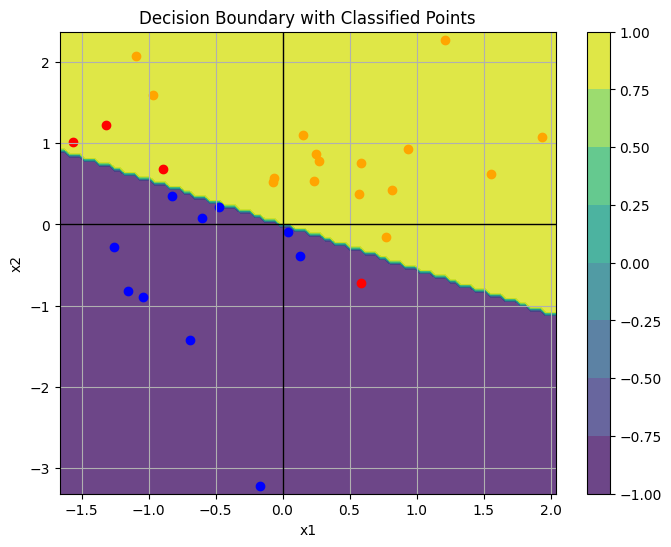

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Given weights and bias
w = [1.20, 2.18]
b = 0.0

# Given data points (Xs) and labels (ys)
Xs = np.array([
    [0.58715982, 0.76053109],
    [-1.09492364, 2.07989924],
    [0.04097468, -0.09437459],
    [-1.15073364, -0.81630217],
    [0.57206772, 0.3813378],
    [0.93345859, 0.92408983],
    [0.58881134, -0.71864108],
    [-0.07350665, 0.51727535],
    [-1.32103648, 1.2211991],
    [-0.82438608, 0.35219818],
    [-0.89396187, 0.67834576],
    [-1.56266947, 1.01928997],
    [-0.06133912, 0.57360667],
    [0.23596025, 0.5329578],
    [1.21315196, 2.27594733],
    [-1.03981669, -0.89622489],
    [0.13371041, -0.39055231],
    [0.81622561, 0.42530499],
    [0.24819307, 0.86653034],
    [0.27427925, 0.78433078],
    [-0.17038365, -3.21936226],
    [-0.47376705, 0.21173016],
    [0.7697084, -0.16046939],
    [1.55237121, 0.6258206],
    [1.93907678, 1.07390485],
    [-0.6018449, 0.07496144],
    [0.15338813, 1.10189419],
    [-0.96326495, 1.59790052],
    [-0.68733638, -1.42420832],
    [-1.26075745, -0.273788]
])

ys = np.array([1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1])

# Calculate mean classification error
predicted_labels = np.array([linear_classifier(point, w, b) for point in Xs])
misclassified = predicted_labels != ys
print(misclassified)
mean_error = np.mean(misclassified)

# Create a grid of points
x1_min, x1_max = np.min(Xs[:, 0]), np.max(Xs[:, 0])
x2_min, x2_max = np.min(Xs[:, 1]), np.max(Xs[:, 1])

# Add a small margin to ensure all points are included
margin = 0.1
x1 = np.linspace(x1_min - margin, x1_max + margin, 100)
x2 = np.linspace(x2_min - margin, x2_max + margin, 100)
x1, x2 = np.meshgrid(x1, x2)


# Calculate the predictions
predictions = linear_classifier(np.c_[x1.ravel(), x2.ravel()], w, b)
predictions = predictions.reshape(x1.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(x1, x2, predictions, alpha=0.8, cmap='viridis')
plt.colorbar()

# Plot training data and color based on prediction vs actual label
for i, point in enumerate(Xs):
    color = 'orange' if predicted_labels[i] == 1 else 'blue'
    if misclassified[i]:
        color = 'red'  # Wrongly classified points
    plt.scatter(point[0], point[1], color=color)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary with Classified Points')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True)
plt.savefig('classification_check.png')

# Print the mean classification error
print(f"Mean Classification Error: {mean_error:.2f}")